## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.565162 -1.650904  1.206501  1.046333  0.465886  0.209711
1  1.533480  0.082145  0.210645 -1.142659  1.589850  0.429772
2 -0.195484  0.280213 -0.714806 -0.688676 -1.585618 -0.693532
3 -0.510510 -0.391073  0.795472 -1.107255  1.675195 -0.463244
4 -0.658267 -0.744607  0.786408  1.391045 -1.779589 -0.128795


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9219715	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9131843	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9045414	total: 58.5ms	remaining: 19.4s
3:	learn: 0.8956296	total: 59.1ms	remaining: 14.7s
4:	learn: 0.8893850	total: 59.6ms	remaining: 11.9s
5:	learn: 0.8810399	total: 60.1ms	remaining: 9.95s
6:	learn: 0.8705487	total: 60.6ms	remaining: 8.59s
7:	learn: 0.8617812	total: 61.1ms	remaining: 7.58s
8:	learn: 0.8532247	total: 61.7ms	remaining: 6.79s
9:	learn: 0.8445291	total: 62.3ms	remaining: 6.16s
10:	learn: 0.8359542	total: 62.8ms	remaining: 5.64s
11:	learn: 0.8272084	total: 63.2ms	remaining: 5.21s
12:	learn: 0.8176468	total: 63.7ms	remaining: 4.84s
13:	learn: 0.8104378	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8046160	total: 64.9ms	remaining: 4.26s
15:	learn: 0.7978135	total: 65.3ms	remaining: 4.02s
16:	learn: 0.7903421	total: 65.8ms	remaining: 3.81s
17:	learn: 0.7824692	total: 66.4ms	remaining: 3.62s
18:	learn: 0.7751245	total: 67ms	remaining: 

103:	learn: 0.3787067	total: 106ms	remaining: 909ms
104:	learn: 0.3758720	total: 106ms	remaining: 904ms
105:	learn: 0.3728517	total: 106ms	remaining: 898ms
106:	learn: 0.3697229	total: 107ms	remaining: 893ms
107:	learn: 0.3672414	total: 107ms	remaining: 887ms
108:	learn: 0.3645097	total: 108ms	remaining: 882ms
109:	learn: 0.3620404	total: 108ms	remaining: 875ms
110:	learn: 0.3593621	total: 109ms	remaining: 871ms
111:	learn: 0.3568925	total: 109ms	remaining: 865ms
112:	learn: 0.3539318	total: 109ms	remaining: 859ms
113:	learn: 0.3514567	total: 110ms	remaining: 855ms
114:	learn: 0.3491487	total: 111ms	remaining: 855ms
115:	learn: 0.3467098	total: 112ms	remaining: 850ms
116:	learn: 0.3442690	total: 112ms	remaining: 845ms
117:	learn: 0.3421002	total: 113ms	remaining: 842ms
118:	learn: 0.3398592	total: 113ms	remaining: 838ms
119:	learn: 0.3374928	total: 114ms	remaining: 834ms
120:	learn: 0.3348496	total: 114ms	remaining: 830ms
121:	learn: 0.3322243	total: 115ms	remaining: 824ms
122:	learn: 

269:	learn: 0.1180766	total: 187ms	remaining: 505ms
270:	learn: 0.1172686	total: 187ms	remaining: 504ms
271:	learn: 0.1166350	total: 188ms	remaining: 502ms
272:	learn: 0.1159159	total: 188ms	remaining: 501ms
273:	learn: 0.1151914	total: 189ms	remaining: 500ms
274:	learn: 0.1145099	total: 189ms	remaining: 499ms
275:	learn: 0.1136489	total: 190ms	remaining: 497ms
276:	learn: 0.1128822	total: 190ms	remaining: 496ms
277:	learn: 0.1121413	total: 191ms	remaining: 495ms
278:	learn: 0.1115058	total: 191ms	remaining: 494ms
279:	learn: 0.1106836	total: 191ms	remaining: 492ms
280:	learn: 0.1098620	total: 192ms	remaining: 491ms
281:	learn: 0.1090480	total: 192ms	remaining: 490ms
282:	learn: 0.1083190	total: 193ms	remaining: 488ms
283:	learn: 0.1075771	total: 193ms	remaining: 487ms
284:	learn: 0.1068090	total: 194ms	remaining: 486ms
285:	learn: 0.1061583	total: 194ms	remaining: 485ms
286:	learn: 0.1053981	total: 195ms	remaining: 484ms
287:	learn: 0.1046072	total: 195ms	remaining: 482ms
288:	learn: 

480:	learn: 0.0345685	total: 289ms	remaining: 312ms
481:	learn: 0.0343425	total: 290ms	remaining: 312ms
482:	learn: 0.0341663	total: 290ms	remaining: 311ms
483:	learn: 0.0339959	total: 291ms	remaining: 310ms
484:	learn: 0.0338019	total: 291ms	remaining: 309ms
485:	learn: 0.0336449	total: 292ms	remaining: 308ms
486:	learn: 0.0334845	total: 292ms	remaining: 308ms
487:	learn: 0.0333690	total: 293ms	remaining: 307ms
488:	learn: 0.0332120	total: 293ms	remaining: 306ms
489:	learn: 0.0330996	total: 294ms	remaining: 306ms
490:	learn: 0.0329368	total: 294ms	remaining: 305ms
491:	learn: 0.0327057	total: 295ms	remaining: 304ms
492:	learn: 0.0325968	total: 295ms	remaining: 303ms
493:	learn: 0.0324464	total: 295ms	remaining: 303ms
494:	learn: 0.0322232	total: 296ms	remaining: 302ms
495:	learn: 0.0320551	total: 296ms	remaining: 301ms
496:	learn: 0.0319507	total: 297ms	remaining: 300ms
497:	learn: 0.0317347	total: 297ms	remaining: 300ms
498:	learn: 0.0315717	total: 298ms	remaining: 299ms
499:	learn: 

653:	learn: 0.0172584	total: 370ms	remaining: 196ms
654:	learn: 0.0172176	total: 371ms	remaining: 195ms
655:	learn: 0.0171844	total: 371ms	remaining: 195ms
656:	learn: 0.0171517	total: 371ms	remaining: 194ms
657:	learn: 0.0171120	total: 372ms	remaining: 193ms
658:	learn: 0.0170798	total: 372ms	remaining: 193ms
659:	learn: 0.0170220	total: 373ms	remaining: 192ms
660:	learn: 0.0169836	total: 373ms	remaining: 191ms
661:	learn: 0.0169552	total: 374ms	remaining: 191ms
662:	learn: 0.0169179	total: 374ms	remaining: 190ms
663:	learn: 0.0168613	total: 374ms	remaining: 189ms
664:	learn: 0.0168251	total: 375ms	remaining: 189ms
665:	learn: 0.0167696	total: 375ms	remaining: 188ms
666:	learn: 0.0167421	total: 376ms	remaining: 188ms
667:	learn: 0.0166721	total: 376ms	remaining: 187ms
668:	learn: 0.0166373	total: 377ms	remaining: 186ms
669:	learn: 0.0165837	total: 377ms	remaining: 186ms
670:	learn: 0.0165573	total: 378ms	remaining: 185ms
671:	learn: 0.0165047	total: 378ms	remaining: 185ms
672:	learn: 

861:	learn: 0.0091655	total: 472ms	remaining: 75.6ms
862:	learn: 0.0091212	total: 473ms	remaining: 75.1ms
863:	learn: 0.0091086	total: 473ms	remaining: 74.5ms
864:	learn: 0.0090962	total: 474ms	remaining: 74ms
865:	learn: 0.0090635	total: 474ms	remaining: 73.4ms
866:	learn: 0.0090445	total: 475ms	remaining: 72.8ms
867:	learn: 0.0090084	total: 475ms	remaining: 72.3ms
868:	learn: 0.0089985	total: 476ms	remaining: 71.7ms
869:	learn: 0.0089865	total: 476ms	remaining: 71.1ms
870:	learn: 0.0089440	total: 476ms	remaining: 70.6ms
871:	learn: 0.0089321	total: 477ms	remaining: 70ms
872:	learn: 0.0089253	total: 477ms	remaining: 69.5ms
873:	learn: 0.0089158	total: 478ms	remaining: 68.9ms
874:	learn: 0.0088976	total: 478ms	remaining: 68.3ms
875:	learn: 0.0088561	total: 479ms	remaining: 67.8ms
876:	learn: 0.0088402	total: 479ms	remaining: 67.2ms
877:	learn: 0.0088286	total: 480ms	remaining: 66.7ms
878:	learn: 0.0088221	total: 480ms	remaining: 66.1ms
879:	learn: 0.0087873	total: 481ms	remaining: 65.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

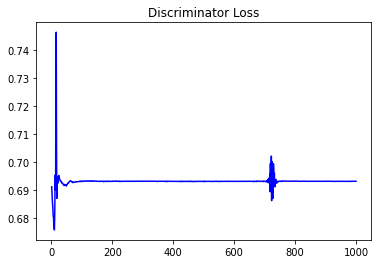

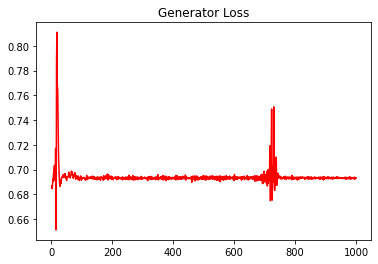

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23025929340138412


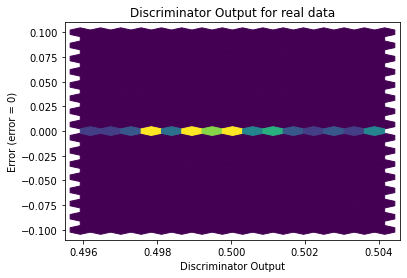

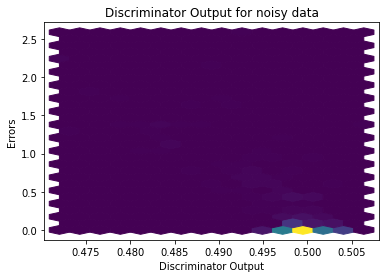

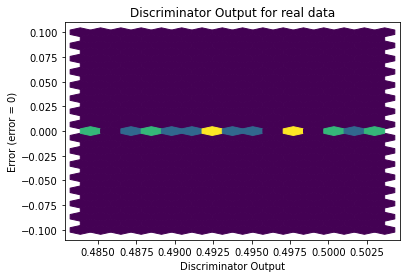

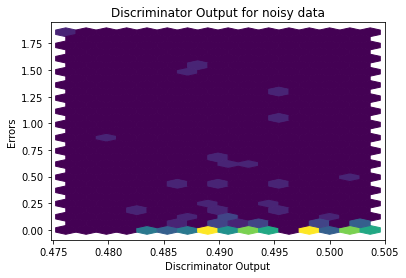

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


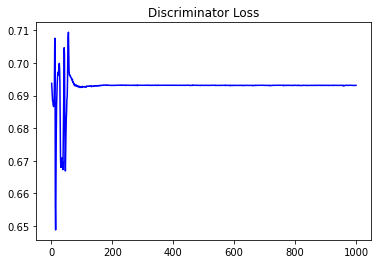

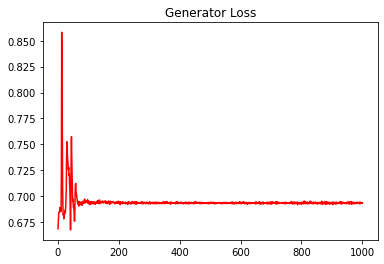

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22864110519816436


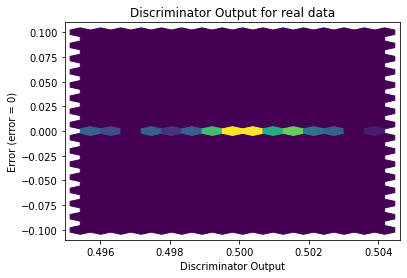

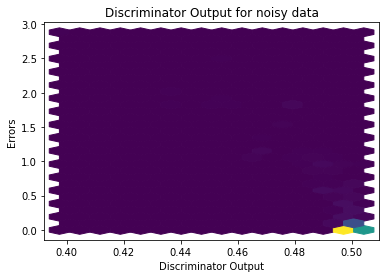

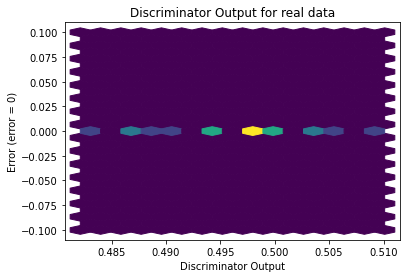

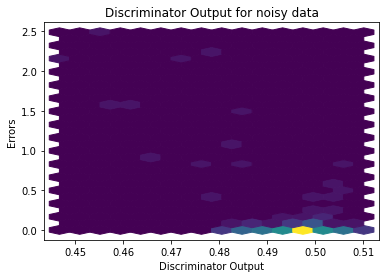

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6703]], requires_grad=True)
